In [1]:
import numpy as np
from math import sin, cos, pi, sqrt, fabs

from numpy import complex128
import time
import pyfftw

In [2]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def moll(x, y, field):

    RAD = 180/np.pi

    plt.figure(figsize=(8,4))
    m = Basemap(projection='moll',lon_0=0,resolution='c')
    #m.contour(x*RAD, y*RAD, field, 10, colors='k', latlon=True)
    m.contourf(x*RAD, y*RAD, field, 512, cmap=plt.cm.jet, latlon=True)

    plt.show()

def flat(x, y, field):
    plt.figure(figsize=(8, 4))
    plt.pcolormesh(x, y, field)

    plt.show()

In [62]:
Lmax = 3
N = 1024

In [63]:
a_coef = np.zeros((Lmax+1, Lmax+1))
b_coef = np.zeros((Lmax+1, Lmax+1))

a_coef[2][2] = 1.0

a_coef[0][0] = 0.0

# coefficient conditions
for m in xrange(0, Lmax + 1):
    for l in xrange(0, m):
        a_coef[m][l] = 0.0
for m in xrange(0, Lmax + 1):
    for l in xrange(0, m):
        b_coef[m][l] = 0.0
for l in xrange(0, Lmax + 1):
    b_coef[0][l] = 0.0

In [76]:
# P_
P_ = np.zeros((N/2, Lmax + 4, Lmax + 4))
for j in xrange(1, N/2):

    teta = 2 * pi * j / float(N) # teta from 0 to pi

    P_[j][0][0] = 1 / sqrt(4*pi)

    for m in xrange(0, Lmax + 3):
        P_[j][m+1][m+1] = P_[j][m][m] * (-sin(teta)) * sqrt(2 * m + 3) / sqrt(2 * m + 2)

    for m in xrange(0, Lmax + 3):
        P_[j][m][m + 1] = P_[j][m][m] * cos(teta) * sqrt(2 * m + 3) 

    for m in xrange(0, Lmax + 2):
        for l in xrange(m + 2, Lmax + 4):
            P_[j][m][l] = float(sqrt(4*l*l-1))/float(sqrt(l*l-m*m)) *cos(teta)*P_[j][m][l-1] - (l+m-1)/float((l-m))*P_[j][m][l-2]*sqrt((2*l+1)*(l-m))/float(sqrt((l+m)*(2*l-3)))
        
x = np.zeros((N, N / 2))
y = np.zeros((N, N / 2))

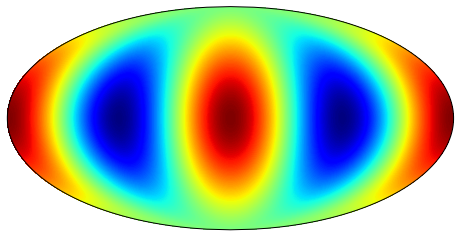

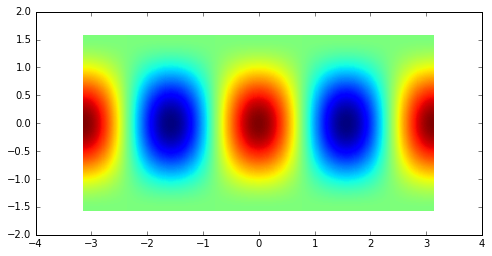

In [77]:
for j in xrange(0, N / 2):
    for i in xrange(0, N):
        x[i][j] = (2 * i - N) / float(N) * pi # x from -pi to pi
        y[i][j] = 2 * j / float(N) * pi - pi / 2 # y from -pi/2 to pi/2

field = np.zeros((N, N / 2))

for j in xrange(1, N / 2):

    theta = 2 * pi * j / float(N) # teta from 0 to pi

    F = complex128(np.zeros((N + 1)))
    F_ = complex128(np.zeros((N + 1)))

    func1 = 0.0
    func2 = 0.0

    for m in xrange(0, Lmax + 1):
        for l in xrange(m, Lmax + 1):
            func1 = func1 + a_coef[m][l] * P_[j][m][l]
            func2 = func2 + b_coef[m][l] * P_[j][m][l]

        F[m] = func1
        F_[m] = func2

        func1 = 0.0
        func2 = 0.0

    T = np.real(pyfftw.interfaces.numpy_fft.fft(F)) + np.imag(pyfftw.interfaces.numpy_fft.fft(F_))

    for i in xrange(0, N):
        field[i][j] = T[i]

moll(x, y, field)
flat(x, y, field)

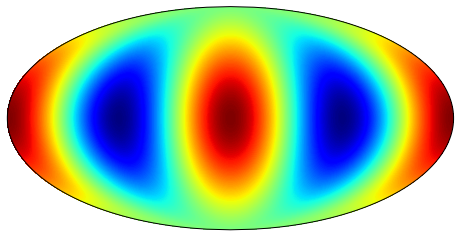

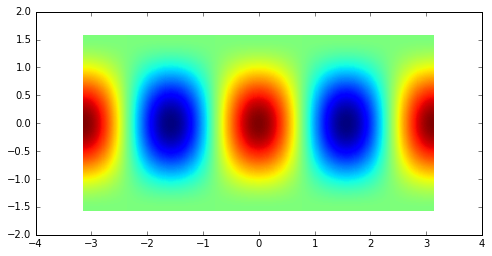

In [78]:
field2 = np.zeros((N, N / 2))

for j in xrange(0, N / 2):
    for i in xrange(0, N):
        x[i][j] = (2 * i - N) / float(N) * pi # x from -pi to pi
        y[i][j] = 2 * j / float(N) * pi - pi / 2 # y from -pi/2 to pi/2

field2 = np.zeros((N, N / 2))

for j in xrange(1, N / 2):

    theta = 2 * pi * j / float(N) # teta from 0 to pi

    F = complex128(np.zeros((N + 1)))
    F_ = complex128(np.zeros((N + 1)))

    func1 = 0.0
    func2 = 0.0

    for m in xrange(0, Lmax + 1):
        for l in xrange(m, Lmax + 1):
            func1 = func1 + a_coef[m][l] * 0.25*sqrt(15/(2*pi))*sin(theta)**2
            func2 = func2 + b_coef[m][l] * P_[j][m][l]

        F[m] = func1
        F_[m] = func2

        func1 = 0.0
        func2 = 0.0

    T = np.real(pyfftw.interfaces.numpy_fft.fft(F)) + np.imag(pyfftw.interfaces.numpy_fft.fft(F_))

    for i in xrange(0, N):
        field2[i][j] = T[i]

moll(x, y, field2)
flat(x, y, field2)

In [79]:
field[50][50:55]

array([ 0.02881658,  0.02994255,  0.0310878 ,  0.03225216,  0.03343545])

In [81]:
field2[50][50:55]

array([ 0.02881658,  0.02994255,  0.0310878 ,  0.03225216,  0.03343545])

In [89]:
P_theta = np.zeros((N/2, Lmax + 4, Lmax + 4))
for j in xrange(1, N/2):

    theta = 2 * pi * j / float(N) # teta from 0 to pi

    for m in xrange(0, Lmax+3):
        for l in xrange(m, Lmax+3):
            c1 = sqrt(float((2 * l + 1) * (l + 1 + m)) / float((2 * l + 3) * (l + 1 - m)))
            P_theta[j][m][l] = -(l+1)*(cos(theta)/sin(theta))*P_[j][m][l] + (1+l-m)*(1/sin(theta))*P_[j][m][l+1]*c1

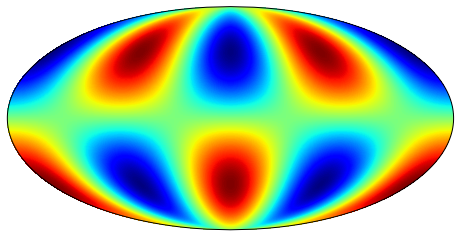

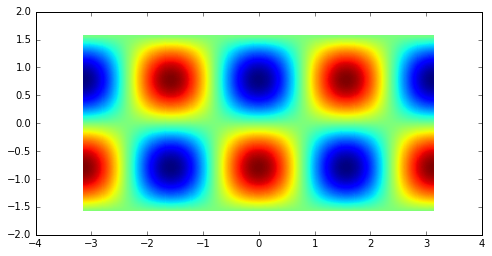

In [83]:
for j in xrange(0, N / 2):
    for i in xrange(0, N):
        x[i][j] = (2 * i - N) / float(N) * pi # x from -pi to pi
        y[i][j] = 2 * j / float(N) * pi - pi / 2 # y from -pi/2 to pi/2

field = np.zeros((N, N / 2))

for j in xrange(1, N / 2):

    theta = 2 * pi * j / float(N) # teta from 0 to pi

    F = complex128(np.zeros((N + 1)))
    F_ = complex128(np.zeros((N + 1)))

    func1 = 0.0
    func2 = 0.0

    for m in xrange(0, Lmax + 1):
        for l in xrange(m, Lmax + 1):
            func1 = func1 + a_coef[m][l] * P_theta[j][m][l]
            func2 = func2 + b_coef[m][l] * P_[j][m][l]

        F[m] = func1
        F_[m] = func2

        func1 = 0.0
        func2 = 0.0

    T = np.real(pyfftw.interfaces.numpy_fft.fft(F)) + np.imag(pyfftw.interfaces.numpy_fft.fft(F_))

    for i in xrange(0, N):
        field[i][j] = T[i]

moll(x, y, field)
flat(x, y, field)

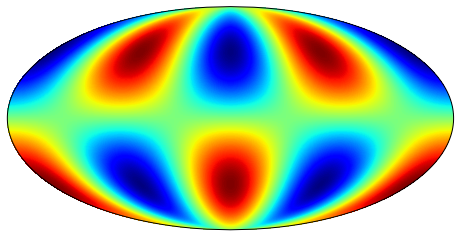

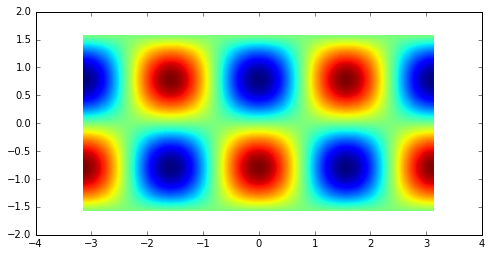

In [84]:
field2 = np.zeros((N, N / 2))

for j in xrange(0, N / 2):
    for i in xrange(0, N):
        x[i][j] = (2 * i - N) / float(N) * pi # x from -pi to pi
        y[i][j] = 2 * j / float(N) * pi - pi / 2 # y from -pi/2 to pi/2

field2 = np.zeros((N, N / 2))

for j in xrange(1, N / 2):

    theta = 2 * pi * j / float(N) # teta from 0 to pi

    F = complex128(np.zeros((N + 1)))
    F_ = complex128(np.zeros((N + 1)))

    func1 = 0.0
    func2 = 0.0

    for m in xrange(0, Lmax + 1):
        for l in xrange(m, Lmax + 1):
            func1 = func1 + a_coef[m][l] * 0.5*sqrt(15/(2*pi))*sin(theta)*cos(theta)
            func2 = func2 + b_coef[m][l] * P_[j][m][l]

        F[m] = func1
        F_[m] = func2

        func1 = 0.0
        func2 = 0.0

    T = np.real(pyfftw.interfaces.numpy_fft.fft(F)) + np.imag(pyfftw.interfaces.numpy_fft.fft(F_))

    for i in xrange(0, N):
        field2[i][j] = T[i]

moll(x, y, field2)
flat(x, y, field2)

In [85]:
field[50][50:55]

array([ 0.18192373,  0.18507991,  0.18820822,  0.19130819,  0.19437935])

In [86]:
field2[50][50:55]

array([ 0.18192373,  0.18507991,  0.18820822,  0.19130819,  0.19437935])

In [135]:
P_2theta = np.zeros((N/2, Lmax + 1, Lmax + 1))
for j in xrange(1, N/2):
    
    theta = 2 * pi * j / float(N) # teta from 0 to pi

    for m in xrange(0, Lmax+1):
        for l in xrange(m, Lmax+1):
            c1 = sqrt(float((2 * l + 1) * (l + 1 + m)) / float((2 * l + 3) * (l + 1 - m)))
            c2 = sqrt(float((2 * l + 1) * (l + 1 + m) * (l + 2 + m)) / float((2 * l + 5) * (l + 1 - m) * (l + 2 - m)))
            P_2theta[j][m][l] = -(l+1)*(cos(theta)/sin(theta))*P_theta[j][m][l] + (1+l-m)*(1/sin(theta))*P_theta[j][m][l+1]*c1
            #P_2theta[j][m][l] = (1/sin(theta)**2)*(0.5*(1+l)*(3 + l + (1 + l)*cos(2*theta))*P_[j][m][l] + (1+l-m)*(-2*(2+l)*cos(theta)*c1*P_[j][m][l+1] + (2+l-m)*c2*P_[j][m][l+2]))

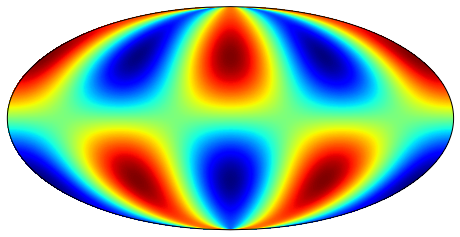

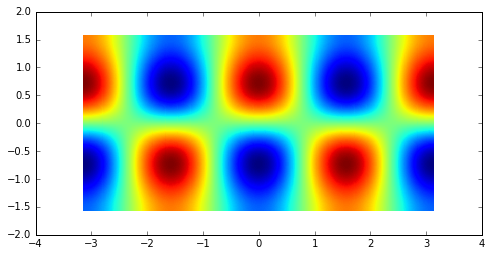

In [136]:
for j in xrange(0, N / 2):
    for i in xrange(0, N):
        x[i][j] = (2 * i - N) / float(N) * pi # x from -pi to pi
        y[i][j] = 2 * j / float(N) * pi - pi / 2 # y from -pi/2 to pi/2

field = np.zeros((N, N / 2))

for j in xrange(1, N / 2):

    theta = 2 * pi * j / float(N) # teta from 0 to pi

    F = complex128(np.zeros((N + 1)))
    F_ = complex128(np.zeros((N + 1)))

    func1 = 0.0
    func2 = 0.0

    for m in xrange(0, Lmax + 1):
        for l in xrange(m, Lmax + 1):
            func1 = func1 + a_coef[m][l] * P_2theta[j][m][l]
            func2 = func2 + b_coef[m][l] * P_[j][m][l]

        F[m] = func1
        F_[m] = func2

        func1 = 0.0
        func2 = 0.0

    T = np.real(pyfftw.interfaces.numpy_fft.fft(F)) + np.imag(pyfftw.interfaces.numpy_fft.fft(F_))

    for i in xrange(0, N):
        field[i][j] = T[i]

moll(x, y, field)
flat(x, y, field)

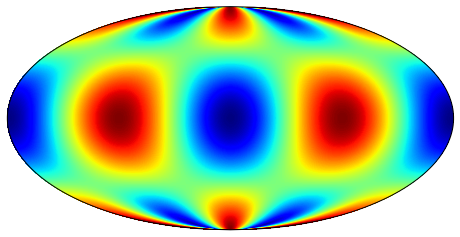

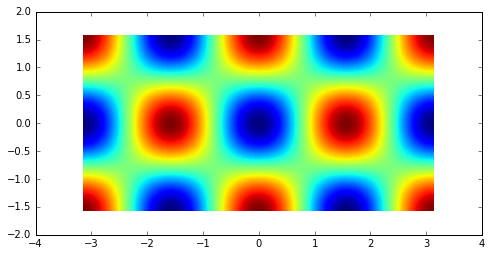

In [134]:
field2 = np.zeros((N, N / 2))

for j in xrange(0, N / 2):
    for i in xrange(0, N):
        x[i][j] = (2 * i - N) / float(N) * pi # x from -pi to pi
        y[i][j] = 2 * j / float(N) * pi - pi / 2 # y from -pi/2 to pi/2

field2 = np.zeros((N, N / 2))

for j in xrange(1, N / 2):

    theta = 2 * pi * j / float(N) # teta from 0 to pi

    F = complex128(np.zeros((N + 1)))
    F_ = complex128(np.zeros((N + 1)))

    func1 = 0.0
    func2 = 0.0

    for m in xrange(0, Lmax + 1):
        for l in xrange(m, Lmax + 1):
            func1 = func1 + a_coef[m][l] * 0.5*sqrt(15/(2*pi))*(cos(theta)**2 - sin(theta)**2)
            func2 = func2 + b_coef[m][l] * P_[j][m][l]

        F[m] = func1
        F_[m] = func2

        func1 = 0.0
        func2 = 0.0

    T = np.real(pyfftw.interfaces.numpy_fft.fft(F)) + np.imag(pyfftw.interfaces.numpy_fft.fft(F_))

    for i in xrange(0, N):
        field2[i][j] = T[i]

moll(x, y, field2)
flat(x, y, field2)